# HW5 Classifiers

## Part 1: MNIST handwritten digits


In [70]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn import datasets, preprocessing, model_selection, metrics, svm, neighbors
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [71]:
# Load the MNIST dataset
digits = datasets.load_digits()
X, y = digits.data, digits.target
print("Data loaded.")

# Scale the data
X_scaled = preprocessing.scale(X)
print("Data scaled.")

Data loaded.
Data scaled.


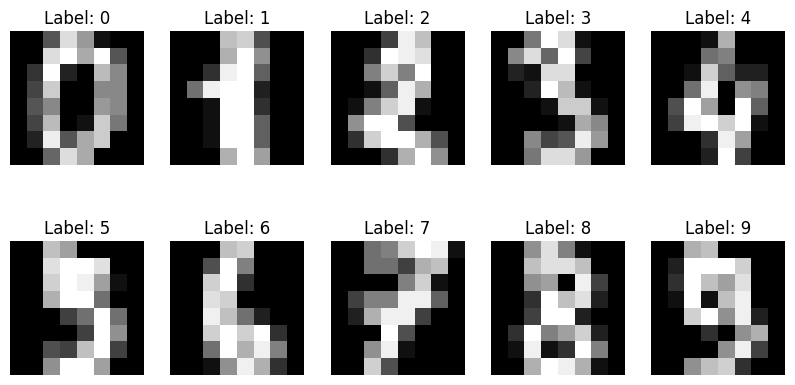

In [72]:
# Plot sample images
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for ax, img, label in zip(axes.flatten(), digits.images, digits.target):
    ax.imshow(img, cmap='gray')
    ax.set_title(f'Label: {label}')
    ax.axis('off')
plt.show()


Data split into training and testing sets.
SVM trained.
SVM Accuracy: 0.9805555555555555
Confusion Matrix:
 [[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 46  1  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  1  0  0 32  0  1]
 [ 0  0  1  0  0  0  0  0 29  0]
 [ 0  0  0  1  0  0  0  0  1 38]]


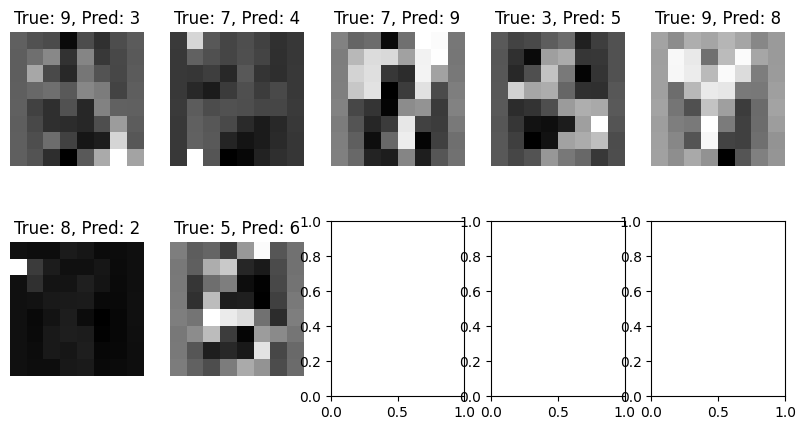

In [73]:

# Load the MNIST dataset
digits = datasets.load_digits()
X, y = digits.data, digits.target

# Scale the data
X_scaled = preprocessing.scale(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print("Data split into training and testing sets.")

# Train the SVM classifier
svm_clf = svm.SVC(kernel='rbf', C=100)
svm_clf.fit(X_train, y_train)
print("SVM trained.")

# Evaluate the classifier
y_pred = svm_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'SVM Accuracy: {accuracy}')

# Compute the confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)

# Identify and plot the most common misclassified digits
misclassified_indices = np.where(y_test != y_pred)[0]
misclassified_images = X_test[misclassified_indices]
misclassified_labels = y_test[misclassified_indices]
predicted_labels = y_pred[misclassified_indices]

fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for ax, img, true_label, pred_label in zip(axes.flatten(), misclassified_images, misclassified_labels, predicted_labels):
    ax.imshow(img.reshape(8, 8), cmap='gray')
    ax.set_title(f'True: {true_label}, Pred: {pred_label}')
    ax.axis('off')
plt.show()

In [74]:
# Use cross_val_score to find the best value of C
C_range = np.linspace(1, 500, 100)
scores = [model_selection.cross_val_score(svm.SVC(kernel='rbf', C=c), X_train, y_train, cv=5).mean() for c in C_range]
best_C = C_range[np.argmax(scores)]
print(f'Best C value: {best_C}')

# Train and test on raw (non-scaled) data
X_train_raw, X_test_raw, y_train_raw, y_test_raw = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)
svm_clf_raw = svm.SVC(kernel='rbf', C=100)
svm_clf_raw.fit(X_train_raw, y_train_raw)
accuracy_raw = metrics.accuracy_score(y_test_raw, svm_clf_raw.predict(X_test_raw))
print(f'SVM Accuracy on raw data: {accuracy_raw}')


Best C value: 11.080808080808081
SVM Accuracy on raw data: 0.9861111111111112


KNN trained.
KNN Accuracy: 0.9722222222222222
KNN Confusion Matrix:
 [[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  1 33  0  0  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 45  1  0  0  1]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  1  0 32  0  1]
 [ 0  2  0  0  0  0  0  0 28  0]
 [ 0  0  0  1  1  1  0  0  0 37]]


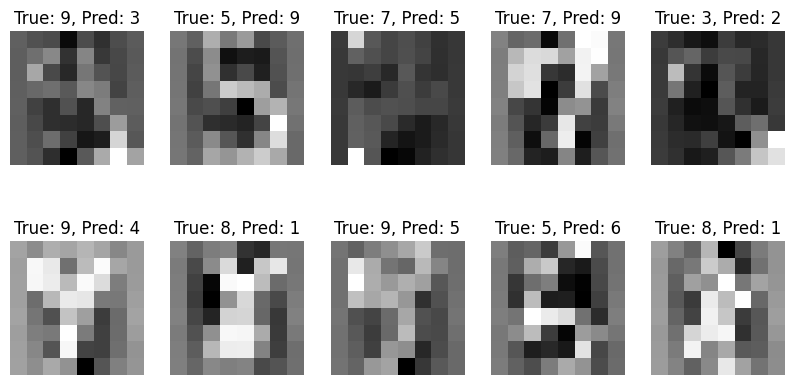

In [75]:
# Train the KNN classifier
knn_clf = neighbors.KNeighborsClassifier(n_neighbors=10)
knn_clf.fit(X_train, y_train)
print("KNN trained.")

# Evaluate the classifier
knn_pred = knn_clf.predict(X_test)
knn_accuracy = metrics.accuracy_score(y_test, knn_pred)
print(f'KNN Accuracy: {knn_accuracy}')

# Compute the confusion matrix
knn_conf_matrix = metrics.confusion_matrix(y_test, knn_pred)
print('KNN Confusion Matrix:\n', knn_conf_matrix)

# Identify and plot the most common misclassified digits
knn_misclassified_indices = np.where(y_test != knn_pred)[0]
knn_misclassified_images = X_test[knn_misclassified_indices]
knn_misclassified_labels = y_test[knn_misclassified_indices]
knn_predicted_labels = knn_pred[knn_misclassified_indices]

fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for ax, img, true_label, pred_label in zip(axes.flatten(), knn_misclassified_images, knn_misclassified_labels, knn_predicted_labels):
    ax.imshow(img.reshape(8, 8), cmap='gray')
    ax.set_title(f'True: {true_label}, Pred: {pred_label}')
    ax.axis('off')
plt.show()


In [76]:
# Use cross_val_score to find the best value of k
k_range = range(1, 21)
knn_scores = [model_selection.cross_val_score(neighbors.KNeighborsClassifier(n_neighbors=k), X_train, y_train, cv=5).mean() for k in k_range]
best_k = k_range[np.argmax(knn_scores)]
print(f'Best k value: {best_k}')


Best k value: 3


## Part 2: Online News Dataset


### Import the data



In [77]:
# Load the dataset
data = pd.read_csv("OnlineNewsPopularity.csv")

# Inspect the column names
print(data.columns)

# Remove any leading or trailing spaces from the column names
data.columns = data.columns.str.strip()

# Drop unnecessary columns
data = data.drop(columns=['url', 'timedelta'])

# Separate predictor variables and target variable
X = data.drop(columns=['shares']).values
shares = data['shares'].values

# Create a binary target variable
median_shares = np.median(shares)
y = (shares > median_shares).astype(int)

print("Data loaded and prepared.")

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

### Exploratory data analysis


In [78]:
# Check min, median, and max number of shares
min_shares = shares.min()
median_shares = np.median(shares)
max_shares = shares.max()

print(f"Min shares: {min_shares}")
print(f"Median shares: {median_shares}")
print(f"Max shares: {max_shares}")


Min shares: 1
Median shares: 1400.0
Max shares: 843300


### Classification using KNN


In [79]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Use cross-validation to choose the best value of k
k_values = range(1, 21)
knn_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    knn_scores.append(scores.mean())

best_k = k_values[np.argmax(knn_scores)]
print(f"Best k value: {best_k}")

# Train and evaluate the KNN classifier
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
knn_accuracy = accuracy_score(y_test, y_pred_knn)

print(f"KNN Accuracy: {knn_accuracy}")


Best k value: 19
KNN Accuracy: 0.6290831126245429


### Classification using SVM


In [80]:
# Use a fraction of the data for initial experiments
X_train_small, _, y_train_small, _ = train_test_split(X_train_scaled, y_train, train_size=5000, random_state=42)

# Experiment with different values of C
C_values = [0.1, 1, 10, 100, 1000]
svm_scores = []

for C in C_values:
    svm_clf = SVC(C=C, kernel='rbf')
    scores = cross_val_score(svm_clf, X_train_small, y_train_small, cv=5, scoring='accuracy')
    svm_scores.append(scores.mean())

best_C = C_values[np.argmax(svm_scores)]
print(f"Best C value: {best_C}")

# Train and evaluate the SVM classifier
svm_clf = SVC(C=best_C, kernel='rbf')
svm_clf.fit(X_train_scaled, y_train)
y_pred_svm = svm_clf.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, y_pred_svm)

print(f"SVM Accuracy: {svm_accuracy}")


Best C value: 1
SVM Accuracy: 0.6541808550889141


### Classification using decision trees


In [89]:
# Define the range of hyperparameters
max_depth_values = np.arange(1, 11)
min_sample_values = np.arange(2, 11)
accuracy_values = []

# Evaluate the accuracy for different hyperparameter combinations using cross-validation
for max_depth in max_depth_values:
    accuracy_max_values = []
    for min_samples_split in min_sample_values:
        clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split)
        scores = cross_val_score(clf, X_train, y_train, cv=5, n_jobs=-1)
        accuracy_max_values.append(np.mean(scores))
    accuracy_values.append(accuracy_max_values)

# Convert the accuracy values to a numpy array for easier indexing
accuracy_scores = np.array(accuracy_values)

# Find the indices of the best hyperparameters
best_indices = np.unravel_index(np.argmax(accuracy_scores), accuracy_scores.shape)
best_max_depth = max_depth_values[best_indices[0]]
best_min_samples_split = min_sample_values[best_indices[1]]
best_accuracy = accuracy_scores[best_indices]

print("Best max depth:", best_max_depth)
print("Best min samples split:", best_min_samples_split)
print("Best accuracy:", best_accuracy)

# Train the Decision Tree classifier with the best hyperparameters
best_tree_clf = DecisionTreeClassifier(max_depth=best_max_depth, min_samples_split=best_min_samples_split)
best_tree_clf.fit(X_train, y_train)

# Evaluate the model on the test data
y_pred_tree = best_tree_clf.predict(X_test)
tree_accuracy = accuracy_score(y_test, y_pred_tree)

print(f"Decision Tree Accuracy on Test Data: {tree_accuracy}")

Best max depth: 7
Best min samples split: 8
Best accuracy: 0.6387513794734353
Decision Tree Accuracy on Test Data: 0.6434607138352881


### Describe your findings


Which method (k-NN, SVM, Decision Tree) worked best?

KNN:
Best k value: 19
KNN Accuracy: 0.6290831126245429

SVM:
Best C value: 1
SVM Accuracy: 0.6541808550889141


Decision Tree:
Best max depth: 7
Best min samples split: 8
Best accuracy: 0.6387513794734353

SVM had the highest accuracy of approximately 65.42%, followed by the Decision Tree with an accuracy of about 63.88%. K-NN had the lowest accuracy among the three methods at around 62.91%. SVM worked best because it had the highest accuracy. 

How did different parameters influence the accuracy?

For KNN the best k value was 19 which indicates that adding more neighbors would help with predictive performance. 
For SVM the best C value was 1, which means 1 parameter optimizes the performance. 
For the decision tree the max depth was 7 and minimum samples split was 8. Which means the tree performs best on a smaller scale. 

Which model is easiest to interpret?

The decision tree is the easiest to interpret. Because they are usually true/false or yes/no. It has straight forward predictions. 


How would you interpret your results?
If I had to pick one to use in general  it would be KNN, because the accuracy is slightly lower than the decision tree, but it can run on a larger scale and it is much faster to run than SVM. If I am going based off of accuracy alone ignoring cost I would pick the SVM. If I want high interpretation and accuracy I would choose the decision tree. 